Реализовать двухслойную полносвязную нейросетку на чистом TF.
Как функцию активации можете использовать что хотите. Размер тоже на ваше усмотрение. 
Предлагаю сделать по образу и подобию тетрадки с пары.

Для следующего дата сета:
    

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.__version__ 

'2.3.1'

# Анализ и предобработка Датасета

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

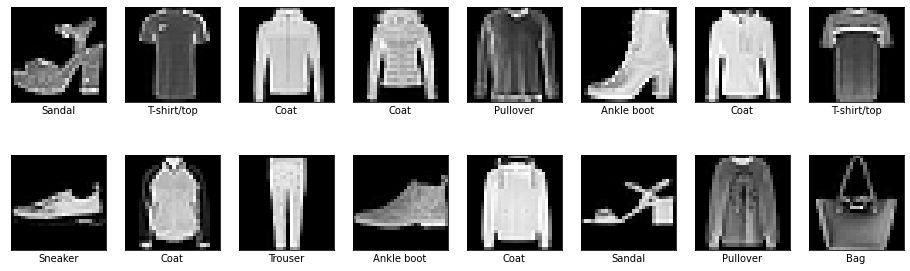

In [7]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

Каждая картинка это матрица из чисел. Если число большое - пиксель яркий. Если маленькое - тёмный. Яркость измеряется по шкале от $0$ до $255$.

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
X_train[0].shape

(28, 28)

Давайте отнормируем выборку. 

In [10]:
X_train = X_train/255
X_test = X_test/255

Будем прогнозировать тип картинки по её пикселям. Давайте растянем её в вектор из $28 \times 28$ фичей.

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28**2)
X_test = X_test.reshape(X_test.shape[0], 28**2)
X_train.shape

(60000, 784)

In [12]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [13]:
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Обучение двухслойной модели

In [20]:
num_classes = 10   # число классов
num_features = 784 # число фичей (28*28 пикселей)

INPUT_SIZE = 784
HIDDEN_SIZE = 256
OUTPUT_SIZE = 10

# Задайте переменные W и b :) 
W1 = tf.Variable(tf.random.normal([INPUT_SIZE,HIDDEN_SIZE]), name='W1')
b1 = tf.Variable(tf.random.normal([HIDDEN_SIZE]), name='b1')
W2 = tf.Variable(tf.random.normal([HIDDEN_SIZE,OUTPUT_SIZE]), name='W2')
b2 = tf.Variable(tf.random.normal([OUTPUT_SIZE]), name='b2')


# прогнозы
def our_nn(X):
    # ваша модель
    result = tf.math.softmax(tf.matmul(tf.nn.relu(tf.matmul(X,W1) + b1),W2)+b2)
    return result

In [22]:
p_pred = our_nn(X_train[:3])
p_pred

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 2.5800855e-07, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.9999976e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 7.0458200e-15, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.2638426e-35, 1.9801762e-22]], dtype=float32)>

Отлично! Теперь давайте реализуем функцию потерь. Использовать будем logloss.

In [23]:
def logloss(p_pred, y_true):
    # Чтобы не возникло log(0) и бесконечностей
    p_pred = tf.clip_by_value(p_pred, 1e-9, 1.)
    # а теперь считаем
    return -tf.reduce_mean(tf.reduce_sum(y_true * tf.math.log(p_pred), axis=1)) 

Чтобы избежать проблем с бесконечностями, обычно logloss считают по-другому, с помощью функции tf.nn.softmax_cross_entropy_with_logits.

In [25]:
p_pred = our_nn(X_train)
logloss(p_pred, y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=18.02597>

На каждой итерации будем искать accuracy

In [26]:
def accuracy(y_pred, y_true):
    # Ваша реализация точности
    vector_class_preds = tf.argmax(y_pred, axis=1)
    vector_class_y = tf.argmax(y_true, axis=1)
    acc = tf.reduce_mean(tf.cast(vector_class_preds==vector_class_y, dtype = tf.float32))
    return acc

In [28]:
accuracy(p_pred, y_train)

<tf.Tensor: shape=(), dtype=float32, numpy=0.10935>

Задаём оптимизатор

In [31]:
learning_rate = 1e-3
optimizer = tf.optimizers.Adam(learning_rate)

Задаём один шаг обучения

In [34]:
@tf.function
def model_train(X, Y):
    
    
# Считаем градиенты
    # находим loss и пробрасываем градиент
    with tf.GradientTape() as g:
        pred = our_nn(X)
        loss = logloss(pred, Y)
    
    # Вычисляем градиенты
    gradients = g.gradient(loss, [W1, W2, b1, b2])
    
    # Обновляем веса в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, [W1, W2, b1, b2]))

In [35]:
W1

<tf.Variable 'W1:0' shape=(784, 256) dtype=float32, numpy=
array([[-0.87201244,  0.83895224, -0.8861004 , ...,  0.31067947,
         0.90483916,  0.05824156],
       [-0.9916123 , -3.4628904 , -0.29348752, ...,  1.055393  ,
         0.01422438,  1.5270392 ],
       [ 1.2333034 ,  0.34041306,  0.26184815, ...,  0.8180045 ,
         0.13155755, -0.05030445],
       ...,
       [ 0.89335155,  0.531213  , -0.05275109, ...,  1.8154349 ,
        -0.32619497,  0.8989378 ],
       [-0.3566765 ,  0.8662902 ,  0.5474903 , ..., -1.5309496 ,
         0.299882  , -0.43211612],
       [ 1.5737379 , -0.45262352, -1.059511  , ..., -0.02322109,
         0.9446973 ,  0.28801945]], dtype=float32)>

In [36]:
# Работает ли?
model_train(X_train, y_train)

In [37]:
W1

<tf.Variable 'W1:0' shape=(784, 256) dtype=float32, numpy=
array([[-0.87201244,  0.83895224, -0.8861004 , ...,  0.31067947,
         0.90483916,  0.05824156],
       [-0.9915838 , -3.4631946 , -0.29329967, ...,  1.055393  ,
         0.01424437,  1.5273415 ],
       [ 1.2335248 ,  0.3407406 ,  0.26193666, ...,  0.81800663,
         0.13119034, -0.0499858 ],
       ...,
       [ 0.8943243 ,  0.53022593, -0.05372937, ...,  1.8146    ,
        -0.32560402,  0.8997478 ],
       [-0.35613889,  0.8653623 ,  0.54662937, ..., -1.5314413 ,
         0.30061945, -0.43229073],
       [ 1.5744226 , -0.4535139 , -1.0590008 , ..., -0.02322106,
         0.94510776,  0.288859  ]], dtype=float32)>

Остался только этап для обучения модели. Напишем функцию, которая будет генерировать из наших данных батчи. Одна эпоха - один проход модели по всем батчам. Один батч - совокупность наблюдений.  В этом может помочь [специальный класс для создания батчей, Dataset.](https://www.tensorflow.org/api_docs/python/tf/data/Dataset)

In [38]:
# создали объект с данными для обучения 
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# перемешали данные с окном в 5000 и сделали кучу батчей размера 512 
train_data = train_data.shuffle(5000).batch(512)

In [39]:
from IPython import display

def visualize(l1,l2, h1, h2):
    plt.figure(figsize=(20,5)) 
    epo_range = range(1,len(h1)+1)
    tick_range = range(1,len(h1)+1,2)
    plt.subplot(1,2,1)
    plt.title('Learning loss')
    plt.plot(epo_range,l1, label='train set')
    plt.plot(epo_range,l2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.legend(title = 'Loss at:')
    
    plt.subplot(1,2,2)
    plt.title('Learning accuracy')
    plt.plot(epo_range,h1, label='train set')
    plt.plot(epo_range,h2, label='valid set')
    plt.grid()
    plt.xticks(tick_range)
    plt.ylim(0, 1.)
    plt.legend(title = 'Accuracy at:')
    
    display.clear_output(wait=True)
    plt.show()

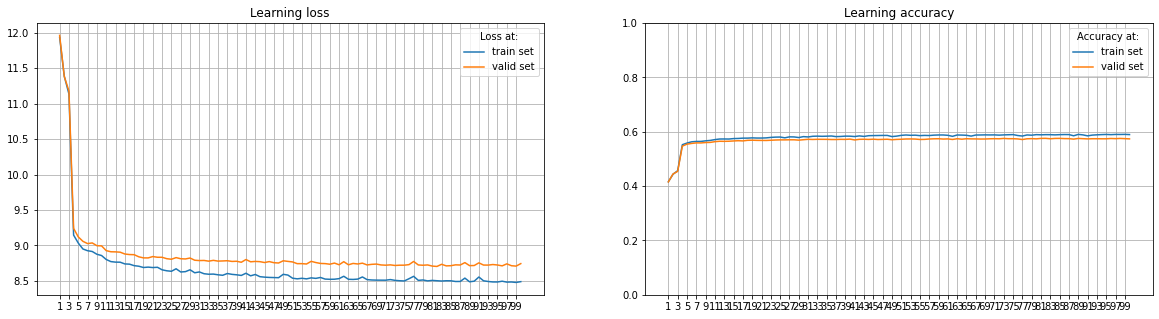

In [40]:
epochs = 100           # число эпох 
training_steps = 1000  # сколько раз на эпохе теребить генератор батчей

# Вектора для метрик
loss_test, loss_train  = [ ], [ ] 
acc_test, acc_train = [ ], [ ]

for i in range(epochs):
    
    # Проходимся по всем батчам
    for batch_x, batch_y in train_data.take(training_steps):
        
        # Делаем щаг градиентного спуска 
        model_train(batch_x, batch_y)
    
    p_train = our_nn(X_train)
    p_test = our_nn(X_test)
    
    loss_train.append(logloss(p_train, y_train))
    loss_test.append(logloss(p_test, y_test))
    
    acc_train.append(accuracy(p_train, y_train))
    acc_test.append(accuracy(p_test, y_test))
    
    # визуализируем
    visualize(loss_train, loss_test, acc_train, acc_test) 